#   TSF Task#4 Decision Trees

In [62]:
# Importing libraries
import pandas as pd

# Loading the dataset
df=pd.read_csv("datasets_19_420_Iris.csv")

In [63]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [64]:
df.shape

(150, 6)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Test Train Split

In [67]:
y=df['Species'].values
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Let us define the Decision Tree Algorithm

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Lets check the Accuracy

In [70]:
pred=dt.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy of the model is',accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

Accuracy of the model is 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.82      0.90        17
 Iris-virginica       0.85      1.00      0.92        17

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



# Let us visualize the Decision Tree to understand it better.

In [72]:
from sklearn import tree
import matplotlib.pyplot as plt

In [73]:
feature_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

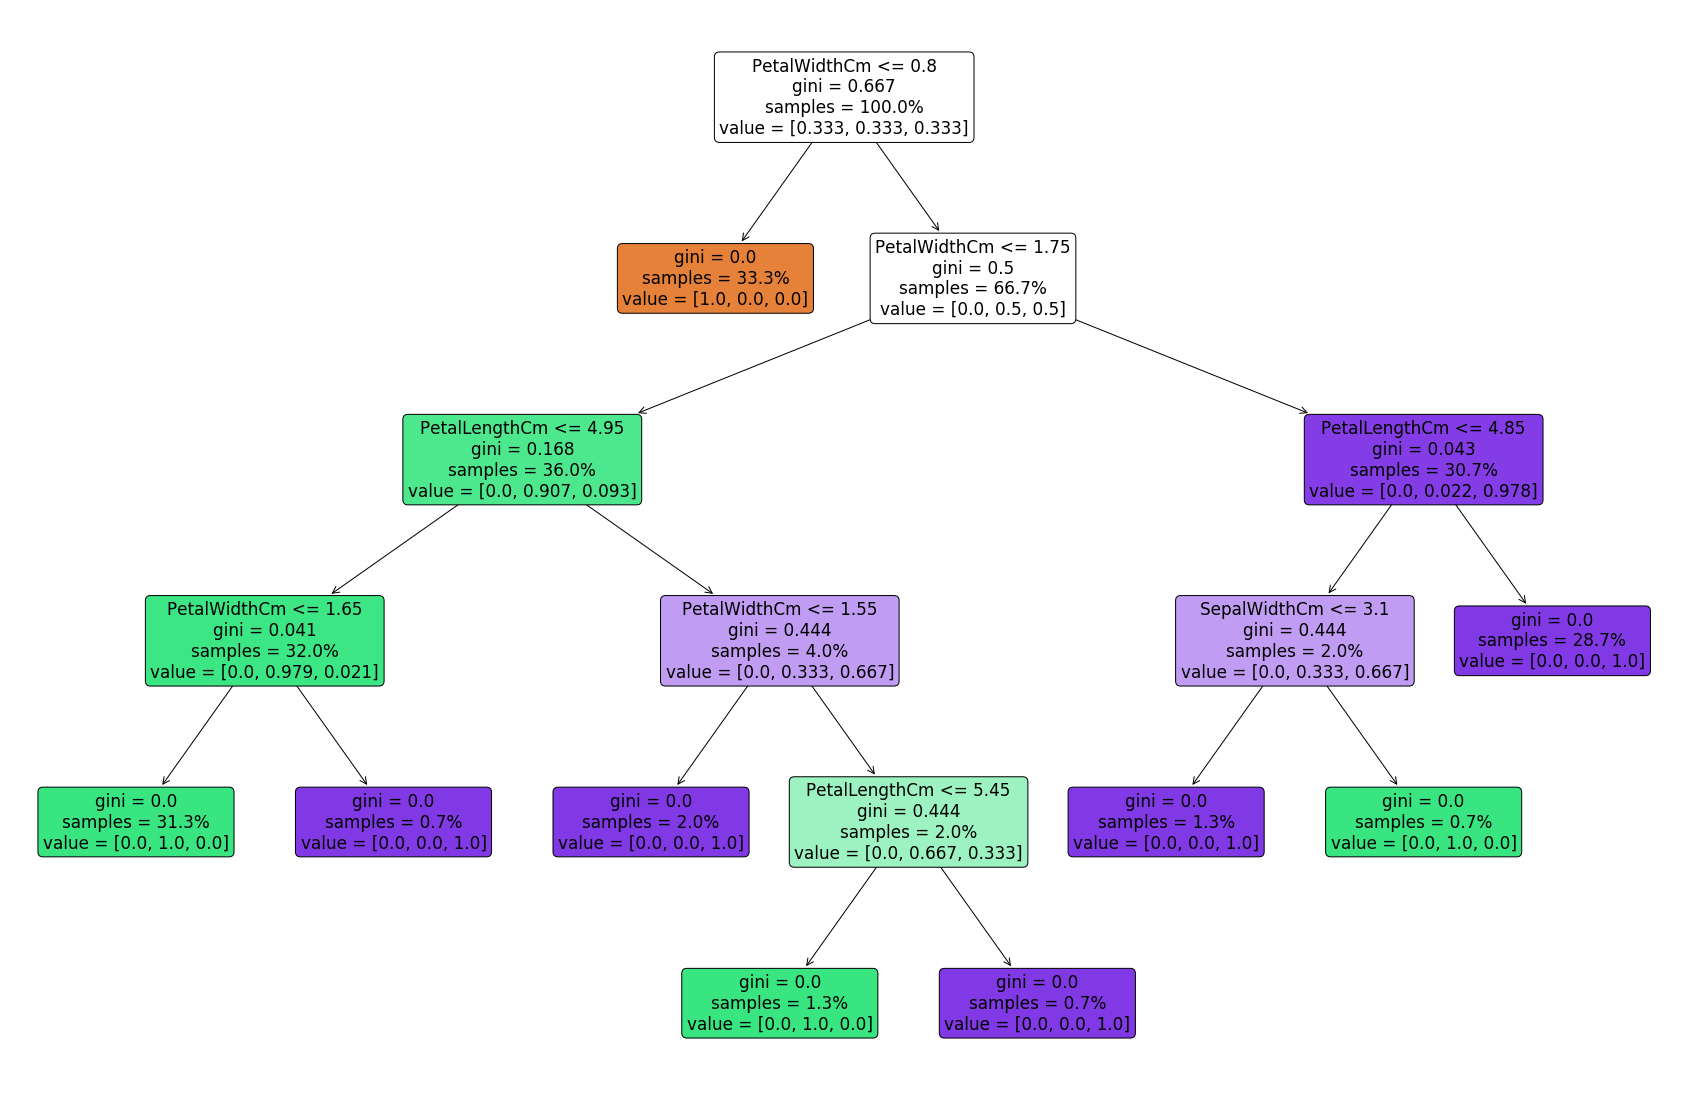

In [74]:
plt.figure(figsize=(30,20))
tree.plot_tree(dt.fit(X,y),feature_names=feature_cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()